In [3]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

pd.set_option('display.max_column', 500)
pd.set_option('display.max_rows', 5000)
random.seed(1001)
sns.set(font="Arial Unicode MS")

In [4]:
dftrain = pd.read_csv('X_train.csv' , index_col=0)
dftest = pd.read_csv('X_test.csv', index_col=0)
ytrain = pd.read_csv('y_train.csv', index_col=0)

print(f"Training df shape = {dftrain.shape}; test df shape = {dftest.shape}")

Training df shape = (9460, 41); test df shape = (2366, 41)


In [5]:
# 把 建築完成年月 換算成 建築年齡
dftrain['建築年齡'] = dftrain['建築完成年月'].apply(lambda x: 
                        (datetime.now() - datetime.strptime(x, "%Y-%m-%d")).days / 365.25)

# 丟掉 建築完成年月
dftrain.drop(['建築完成年月'], axis=1, inplace=True)

dftest['建築年齡'] = dftest['建築完成年月'].apply(lambda x:
                        (datetime.now() - datetime.strptime(x, "%Y-%m-%d")).days / 365.25)

dftest.drop(['建築完成年月'], axis=1, inplace=True)

In [6]:
# 把 交易年	交易日 交易月 丟掉，變成有小數點的年份
mini = dftrain['交易年'].min()
dftrain['交易年'] = dftrain['交易年'] + dftrain['交易月'] / 12 + dftrain['交易日'] / 365.25
dftrain.drop(['交易日', '交易月'], axis=1, inplace=True)

dftrain['交易年'] = dftrain['交易年'] - mini

dftest['交易年'] = dftest['交易年'] + dftest['交易月'] / 12 + dftest['交易日'] / 365.25
dftest.drop(['交易日', '交易月'], axis=1, inplace=True)
dftest['交易年'] = dftest['交易年'] - mini


In [7]:
dftrain.head()

,鄉鎮市區,交易標的,路名,土地移轉總面積平方公尺,都市土地使用分區,土地數,建物數,車位數,移轉層次,移轉層次項目,總樓層數,建物型態,主要用途,主要建材,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,交易年,地鐵站,超商,公園,托兒所,國小,國中,高中職,大學,金融機構,醫院,大賣場,超市,百貨公司,警察局,消防局,縱坐標,橫坐標,建築年齡
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,文山區,房地(土地+建物)+車位,興隆路三段,27.75,住,1.0,1.0,1.0,1,無,7.0,華廈(10層含以下有電梯),見其他登記事項,鋼筋混凝土造,133.43,3,2,2,有,有,7.751540,1.0,7.0,2.0,20.0,20.0,19.0,12.0,17.0,15.0,20.0,7.0,20.0,13.0,20.0,16.0,24.957269,121.588026,5.100616
1,中正區,房地(土地+建物),金山南路一段,9.57,第三種住宅區,1.0,1.0,0.0,5,無,6.0,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,40.34,1,1,1,有,有,9.105236,1.0,12.0,8.0,20.0,20.0,20.0,13.0,20.0,20.0,20.0,13.0,20.0,20.0,20.0,20.0,24.997141,121.558262,27.255305
2,文山區,房地(土地+建物),秀明路一段,9.51,住,1.0,1.0,0.0,1,無,7.0,套房(1房1廳1衛),住家用,鋼筋混凝土造,70.61,1,1,1,有,有,8.412731,0.0,6.0,7.0,20.0,20.0,18.0,11.0,19.0,15.0,18.0,6.0,20.0,11.0,20.0,13.0,24.953906,121.601050,15.526352
3,內湖區,房地(土地+建物)+車位,康樂街,23.67,第三種住宅區,1.0,1.0,1.0,10,無,15.0,住宅大樓(11層含以上有電梯),見其他登記事項,鋼筋混凝土造,143.83,3,2,2,有,有,7.513689,1.0,12.0,14.0,20.0,20.0,14.0,5.0,4.0,19.0,20.0,12.0,20.0,13.0,20.0,15.0,25.008046,121.557424,15.578371
4,北投區,房地(土地+建物),公路,22.50,第三種住宅區,1.0,1.0,0.0,2,無,5.0,公寓(5樓含以下無電梯),住家用,鋼筋混凝土造,83.73,2,1,1,有,無,9.355236,2.0,4.0,13.0,20.0,20.0,15.0,5.0,15.0,19.0,20.0,10.0,20.0,16.0,18.0,13.0,24.986825,121.557424,51.764545


In [ ]:
def gen_features(dftrain, dftest, numfeatures, catfeatures, encoder):
    # Combine train and test data for categorical features
    combined_cat = pd.concat([dftrain[catfeatures], dftest[catfeatures]])
    
    # Fit encoder on the combined data
    encoder.fit(combined_cat)
    
    # Transform training data
    X_train = dftrain[numfeatures].to_numpy()  # Numerical features
    X_train_cat = encoder.transform(dftrain[catfeatures]).toarray()  # Encoded categorical features
    X_train = np.hstack((X_train, X_train_cat))
    
    # Transform testing data
    X_test = dftest[numfeatures].to_numpy()  # Numerical features
    X_test_cat = encoder.transform(dftest[catfeatures]).toarray()  # Encoded categorical features
    X_test = np.hstack((X_test, X_test_cat))
    
    return X_train, X_test

In [9]:
#get the column names of dftrain
numfeatures = dftrain.select_dtypes(include=[np.number]).columns
print(f"Numerical features = {numfeatures}")
print(f"Number of numerical features = {len(numfeatures)}")
numfeatures = numfeatures.tolist()

# Update np.object to just 'object' in the dtype selection
catfeatures = dftrain.select_dtypes(include=['object']).columns
print(f"Categorical features = {catfeatures}")
print(f"Number of categorical features = {len(catfeatures)}")
catfeatures = catfeatures.tolist()

Numerical features = Index(['土地移轉總面積平方公尺', '土地數', '建物數', '車位數', '移轉層次', '總樓層數', '建物移轉總面積平方公尺',
       '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛', '交易年', '地鐵站', '超商', '公園', '托兒所',
       '國小', '國中', '高中職', '大學', '金融機構', '醫院', '大賣場', '超市', '百貨公司', '警察局',
       '消防局', '縱坐標', '橫坐標', '建築年齡'],
      dtype='object')
Number of numerical features = 29
Categorical features = Index(['鄉鎮市區', '交易標的', '路名', '都市土地使用分區', '移轉層次項目', '建物型態', '主要用途', '主要建材',
       '建物現況格局-隔間', '有無管理組織'],
      dtype='object')
Number of categorical features = 10


In [ ]:
X_train_all, X_test_all = gen_features(dftrain, dftest, numfeatures, catfeatures, OneHotEncoder())
print(f"X_train shape = {X_train_all.shape}; X_test shape = {X_test_all.shape}")

X_train shape = (9460, 741); X_test shape = (2366, 741)


In [11]:
import optuna
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_train_all, ytrain, test_size=0.2, random_state=1001)

'''
feature_selector = SelectFromModel(
    estimator=RandomForestRegressor(n_estimators=100, random_state=1001), 
    threshold="0*mean"
)
feature_selector.fit(X_train, y_train.values.ravel())

# Transform the training and validation sets
X_train_selected = feature_selector.transform(X_train)
X_val_selected = feature_selector.transform(X_val)
X_train_all_selected = feature_selector.transform(X_train_all)
'''

X_train_selected = X_train
X_val_selected = X_val
X_train_all_selected = X_train_all

/Users/jaylin/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 500, 2000, step=500)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1, log=True)
    max_depth = trial.suggest_int('max_depth', 3, 8)
    subsample = trial.suggest_float('subsample', 0.8, 1.0)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    
    # Initialize the model with the suggested parameters
    gbr = GradientBoostingRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        subsample=subsample,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=1001
    )
    
    
    
    # Fit the model
    gbr.fit(X_train_selected, y_train.values.ravel())
    
    # Predict on the validation set
    y_pred = gbr.predict(X_val_selected)
        
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    return rmse

# Create an Optuna study and optimize
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20, n_jobs=-1)

# Get the best parameters and validation RMSE
best_params = study.best_params
best_rmse = study.best_value

print(f"Best parameters: {best_params}")
print(f"Validation RMSE: {best_rmse}")


[I 2024-11-21 01:00:11,336] A new study created in memory with name: no-name-0a9df5e8-836f-4faf-9ada-47b509fc5480
[I 2024-11-21 01:05:53,199] Trial 0 finished with value: 34516.738414653584 and parameters: {'n_estimators': 500, 'learning_rate': 0.011662211257345598, 'max_depth': 7, 'subsample': 0.9759432924564304, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 0 with value: 34516.738414653584.
[I 2024-11-21 01:06:58,806] Trial 5 finished with value: 33439.67616312066 and parameters: {'n_estimators': 500, 'learning_rate': 0.0738299097746145, 'max_depth': 7, 'subsample': 0.923791547878532, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 5 with value: 33439.67616312066.
[I 2024-11-21 01:08:04,905] Trial 1 finished with value: 34101.21843121987 and parameters: {'n_estimators': 1000, 'learning_rate': 0.01343198623714103, 'max_depth': 5, 'subsample': 0.827130250163721, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 5 with value: 33439.67616312066.


Best parameters: {'n_estimators': 1500, 'learning_rate': 0.025469889165697028, 'max_depth': 8, 'subsample': 0.8517843833202309, 'min_samples_split': 10, 'min_samples_leaf': 4}
Validation RMSE: 32786.071429620235


In [13]:
# Use the best parameters and the complete training data to train the model
final_model = GradientBoostingRegressor(**study.best_params, random_state=1001)
final_model.fit(X_train_all, ytrain.values.ravel())

# Predict on the test data
y_pred = final_model.predict(X_test_all)

In [14]:
#save the final_model
import pickle
with open('final_model_gdboost.pkl', 'wb') as f:
    pickle.dump(final_model, f)

In [ ]:
# Write the predictions to a CSV file
submission = pd.DataFrame({'單價元平方公尺': y_pred}, index=dftest.index)
#submission.to_csv('submission_gdboost.csv', index=True)

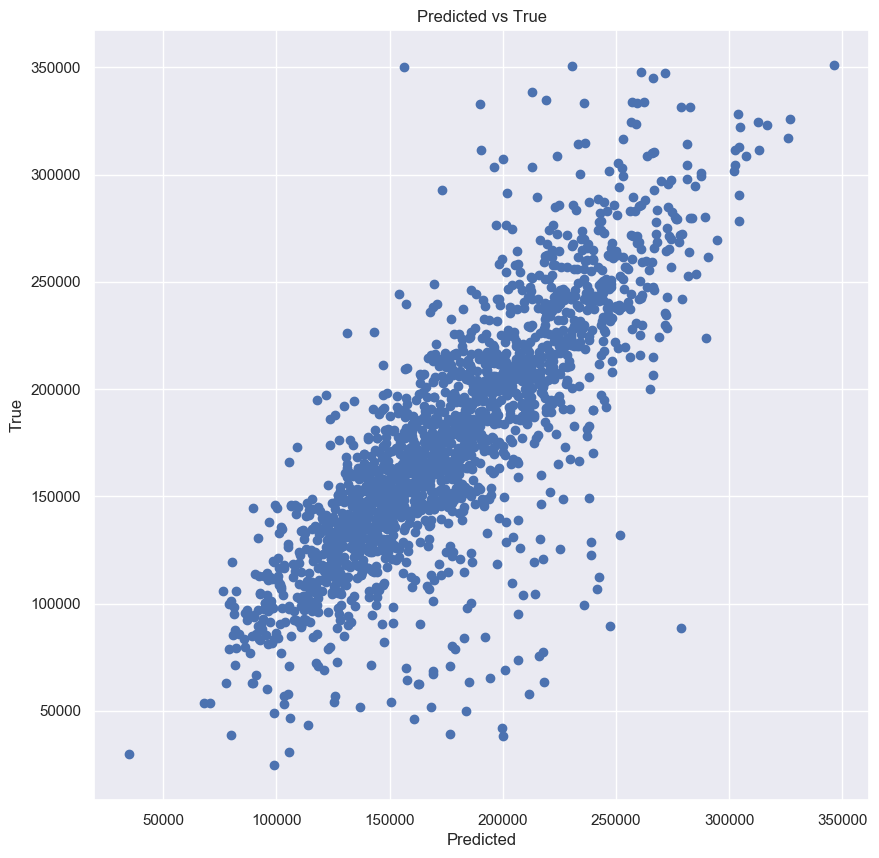

In [15]:
final_model.fit(X_train, y_train.values.ravel())
Y_val_pred = final_model.predict(X_val)

#plot the predicted value and the true value
plt.figure(figsize=(10, 10))
plt.scatter(Y_val_pred, y_val)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Predicted vs True')
plt.show()

In [19]:
#Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_val, Y_val_pred))
print(f"Validation RMSE: {rmse}")

Validation RMSE: 32786.071429620235


In [ ]:
#y_val_pred_gdboost = pd.read_csv('submission_gdboost.csv', index_col=0)
#y_val_pred_xgboost = pd.read_csv('submission_xgboost_nofs.csv', index_col=0)

#y_val_pred_avg = (y_val_pred_gdboost + y_val_pred_xgboost) / 2

#write to final_pred.csv
#y_val_pred_avg.to_csv('final_pred.csv', index=True)